In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phishing-site-urls/phishing_site_urls.csv


In [13]:
import gc 
def report_gpu(): 
    print(torch.cuda.list_gpu_processes()) 
    gc.collect() 
    torch.cuda.empty_cache()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/phishing-site-urls/phishing_site_urls.csv')

In [4]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
# Initialize NLTK's regex tokenizer for tokenizing URLs
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
# Initialize Snowball and Lancaster stemmers
snowball_stemmer = SnowballStemmer('english')
# Tokenize URLs, apply stemming, and create new columns
data['Tokens'] = data['URL'].apply(lambda x: tokenizer.tokenize(x))
data['Snowball_Stems'] = data['Tokens'].apply(lambda tokens: [snowball_stemmer.stem(token) for token in tokens])

In [5]:
data['Snowball_Stems_Joined'] = data['Snowball_Stems'].apply(lambda stems: ' '.join(stems))

In [6]:
label_mapping = {'good': 0, 'bad': 1}
data['Label'] = data['Label'].map(label_mapping)

In [8]:
data

,URL,Label,Tokens,Snowball_Stems,Snowball_Stems_Joined
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,1,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,1,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...
...,...,...,...,...,...
549341,23.227.196.215/,1,[],[],
549342,apple-checker.org/,1,"[apple, checker, org]","[appl, checker, org]",appl checker org
549343,apple-iclods.org/,1,"[apple, iclods, org]","[appl, iclod, org]",appl iclod org
549344,apple-uptoday.org/,1,"[apple, uptoday, org]","[appl, uptoday, org]",appl uptoday org


In [8]:
data = data[['Snowball_Stems_Joined', 'Label']]

In [10]:
data

,Snowball_Stems_Joined,Label
0,nobel it ffb d dca cce f login skype com en cg...,1
1,www dghjdgf com paypal co uk cycgi bin webscrc...,1
2,serviciosbi com paypal cgi bin get into herf s...,1
3,mail printakid com www onlin americanexpress c...,1
4,thewhiskeydreg com wp content theme widescreen...,1
...,...,...
549341,,1
549342,appl checker org,1
549343,appl iclod org,1
549344,appl uptoday org,1


In [11]:
len(data)

549346

In [12]:
is_consecutive = data.index.equals(range(len(data)))

if is_consecutive:
    print("Indices are consecutive.")
else:
    print("Indices are not consecutive.")


Indices are not consecutive.


In [13]:
has_duplicates = data.index.duplicated().any()

if has_duplicates:
    print("Duplicate indices are present.")
else:
    print("No duplicate indices.")

No duplicate indices.


In [6]:
# Assuming 'data' is your DataFrame
half_idx = len(data) // 2
X_half1, y_half1 = data['Snowball_Stems_Joined'][:half_idx], data['Label'][:half_idx]
X_half2, y_half2 = data['Snowball_Stems_Joined'][half_idx:], data['Label'][half_idx:]


In [7]:
X_half1.reset_index(drop=True, inplace=True)
y_half1.reset_index(drop=True, inplace=True)
X_half2.reset_index(drop=True, inplace=True)
y_half2.reset_index(drop=True, inplace=True)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Multinomial Naive Bayes': MultinomialNB(),
    
}

k_folds = 5

In [10]:
for half_idx, (X_half, y_half) in enumerate([(X_half1, y_half1), (X_half2, y_half2)], start=1):
    print(f"\n### Processing Half {half_idx} ###")

    # Step 2: Apply TF-IDF vectorization
    vectorizer = TfidfVectorizer()
    X_tfidf = vectorizer.fit_transform(X_half)

    # Step 3: Train-test split for the current half
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_half, test_size=0.2, random_state=42)

    # Perform K-fold cross-validation for each model
    for name, model in models.items():
        # Perform K-fold cross-validation
        kfold = KFold(n_splits=k_folds, shuffle=True, random_state=42)
        scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

        # Print average accuracy across folds for each model
        print(f'{name}: Mean Accuracy = {scores.mean()}, Std Dev = {scores.std()}')


### Processing Half 1 ###


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: Mean Accuracy = 0.9573219027953256, Std Dev = 0.0002665572458680775
Multinomial Naive Bayes: Mean Accuracy = 0.9657091655218238, Std Dev = 0.00047427023789907246

### Processing Half 2 ###


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: Mean Accuracy = 0.9663508375032837, Std Dev = 0.0008838474434115983
Multinomial Naive Bayes: Mean Accuracy = 0.9638751635411206, Std Dev = 0.0006834618279449882


In [11]:
X_combined = pd.concat([X_half1, X_half2])
y_combined = pd.concat([y_half1, y_half2])

In [12]:
vectorizer1 = TfidfVectorizer()
X_combined = vectorizer1.fit_transform(X_combined).toarray()

In [7]:
half_idx = len(data) // 2
X_half1, y_half1 = data['Snowball_Stems_Joined'][:half_idx], data['Label'][:half_idx]
X_half2, y_half2 = data['Snowball_Stems_Joined'][half_idx:], data['Label'][half_idx:]


In [8]:
y_half1

0         1
1         1
2         1
3         1
4         1
         ..
274668    0
274669    0
274670    0
274671    0
274672    0
Name: Label, Length: 274673, dtype: int64

In [8]:
X_half1.reset_index(drop=True, inplace=True)
y_half1.reset_index(drop=True, inplace=True)
X_half2.reset_index(drop=True, inplace=True)
y_half2.reset_index(drop=True, inplace=True)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = TfidfVectorizer()
X_tfidf1 = vectorizer1.fit_transform(X_half1)

In [11]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_tfidf1, y_half1, test_size=0.2, random_state=42)

In [12]:
y_half1

0         1
1         1
2         1
3         1
4         1
         ..
274668    0
274669    0
274670    0
274671    0
274672    0
Name: Label, Length: 274673, dtype: int64

In [13]:

from sklearn.linear_model import LogisticRegression
final_model1 = LogisticRegression()
final_model1.fit(X_train1, y_train1)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
test_predictions1 = final_model1.predict(X_test1)
test_accuracy1 = accuracy_score(y_test1, test_predictions1)
print("Test Accuracy1:", test_accuracy1)

Test Accuracy1: 0.9604805679439338


In [15]:
train_predictions1 = final_model1.predict(X_train1)
train_accuracy1 = accuracy_score(y_train1, train_predictions1)
print("Train Accuracy1:", train_accuracy1)

Train Accuracy1: 0.9706878191300549


In [16]:
conf_matrix1 = confusion_matrix(y_test1, test_predictions1)
print("Confusion Matrix:")
print(conf_matrix1)

Confusion Matrix:
[[36399   425]
 [ 1746 16365]]


In [17]:
vectorizer2 = TfidfVectorizer()
X_tfidf2 = vectorizer2.fit_transform(X_half2)

In [18]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_tfidf2, y_half2, test_size=0.2, random_state=42)

In [19]:
y_half2

274673    0
274674    0
274675    0
274676    0
274677    0
         ..
549341    1
549342    1
549343    1
549344    1
549345    1
Name: Label, Length: 274673, dtype: int64

In [20]:
final_model2 = LogisticRegression()
final_model2.fit(X_train2, y_train2)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
test_predictions2 = final_model2.predict(X_test2)
test_accuracy2 = accuracy_score(y_test2, test_predictions2)
print("Test Accuracy2:", test_accuracy1)

Test Accuracy2: 0.9604805679439338


In [22]:
train_predictions2 = final_model2.predict(X_train2)
train_accuracy2 = accuracy_score(y_train2, train_predictions2)
print("Train Accuracy2:", train_accuracy2)

Train Accuracy2: 0.9809727948738953


In [23]:
conf_matrix2 = confusion_matrix(y_test2, test_predictions2)
print("Confusion Matrix:")
print(conf_matrix2)

Confusion Matrix:
[[41386   291]
 [ 1482 11776]]


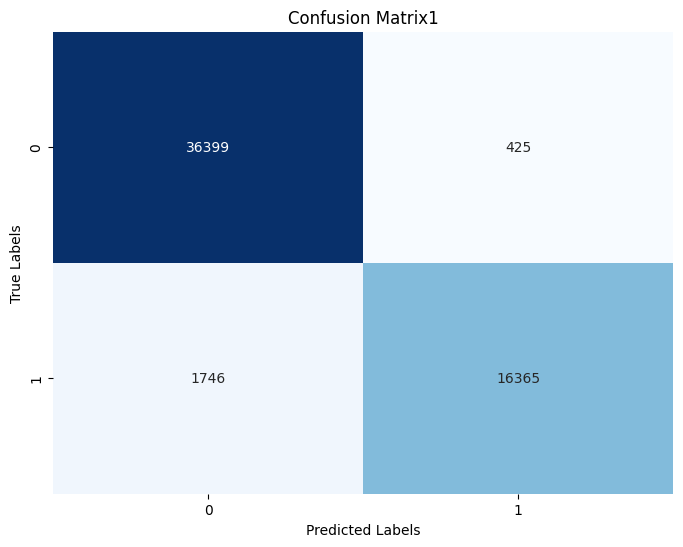

In [45]:
conf_matrix1 = confusion_matrix(y_test1, test_predictions1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix1')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

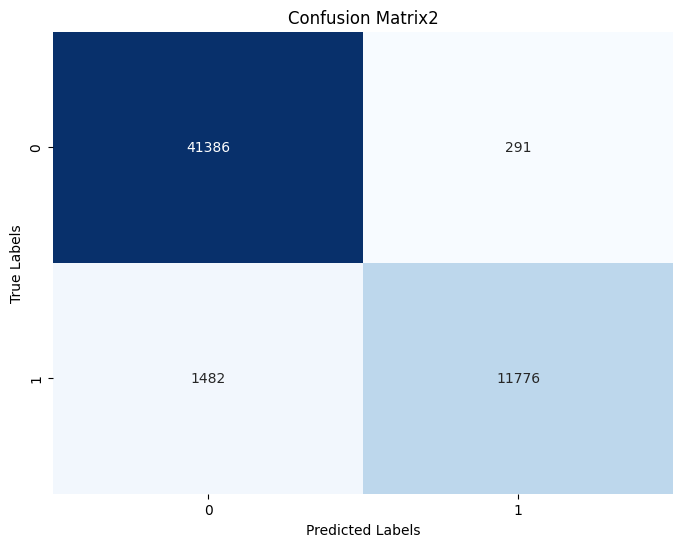

In [46]:
conf_matrix2 = confusion_matrix(y_test2, test_predictions2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix2')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [24]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']

In [25]:
def preprocess_url(url):
    tokenizer = RegexpTokenizer(r'[A-Za-z]+')
    snowball_stemmer = SnowballStemmer('english')
    tokens = tokenizer.tokenize(url)
    stems = [snowball_stemmer.stem(token) for token in tokens]
    return ' '.join(stems)


In [26]:
preprocessed_bad = [preprocess_url(url) for url in predict_bad]
preprocessed_good = [preprocess_url(url) for url in predict_good]
X_bad1 = vectorizer1.transform(preprocessed_bad)
X_bad2 = vectorizer2.transform(preprocessed_bad)
X_good1 = vectorizer1.transform(preprocessed_good)
X_good2 = vectorizer2.transform(preprocessed_good)
    
    # Make predictions using both models
predictions_bad1 = final_model1.predict(X_bad1)
predictions_bad2 = final_model2.predict(X_bad2)
predictions_good1 = final_model1.predict(X_good1)
predictions_good2 = final_model2.predict(X_good2)



In [27]:
print("Predictions for bad URLs (final_model1):", predictions_bad1)
print("Predictions for good URLs (final_model2):", predictions_bad2)
print("Predictions for bad URLs (final_model1):", predictions_good1)
print("Predictions for good URLs (final_model2):", predictions_good2)

Predictions for bad URLs (final_model1): [1 1 1 1]
Predictions for good URLs (final_model2): [1 1 1 1]
Predictions for bad URLs (final_model1): [0 0 0 0]
Predictions for good URLs (final_model2): [0 0 0 0]


In [30]:
def predict_single_url(url, final_model1, final_model2, vectorizer1, vectorizer2, preprocess_url):
    # Preprocess the URL
    preprocessed_url = preprocess_url(url)
    
    # Transform the preprocessed URL using both vectorizers
    X_url1 = vectorizer1.transform([preprocessed_url])
    X_url2 = vectorizer2.transform([preprocessed_url])
    
    # Make predictions using both models
    prediction1 = final_model1.predict(X_url1)[0]
    prediction2 = final_model2.predict(X_url2)[0]
    
    # Return predictions
    return prediction1, prediction2

# Example usage
url = 'yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php'
prediction1, prediction2 = predict_single_url(url, final_model1, final_model2, vectorizer1, vectorizer2, preprocess_url)
print("Prediction for URL:", (prediction1+prediction2)//2)



Prediction for URL: 1


In [32]:
import joblib

# Save trained models
joblib.dump(final_model1, 'final_model1.pkl')

['final_model1.pkl']

In [33]:
joblib.dump(final_model2, 'final_model2.pkl')


['final_model2.pkl']

In [34]:
joblib.dump(vectorizer1, 'vectorizer1.pkl')

['vectorizer1.pkl']

In [35]:
joblib.dump(vectorizer2, 'vectorizer2.pkl')


['vectorizer2.pkl']

In [36]:
label_mapping = {'good': 0, 'bad': 1}  # Assuming this is your label mapping
joblib.dump(label_mapping, 'label_mapping.pkl')

['label_mapping.pkl']

In [37]:
joblib.dump(preprocess_url, 'preprocess_url.pkl')


['preprocess_url.pkl']